In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = '#00000000'

In [6]:
raw_df = pd.read_csv('weatherAUS.csv')

In [7]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


<Axes: title={'center': 'no of rows per year'}, xlabel='Date', ylabel='count'>

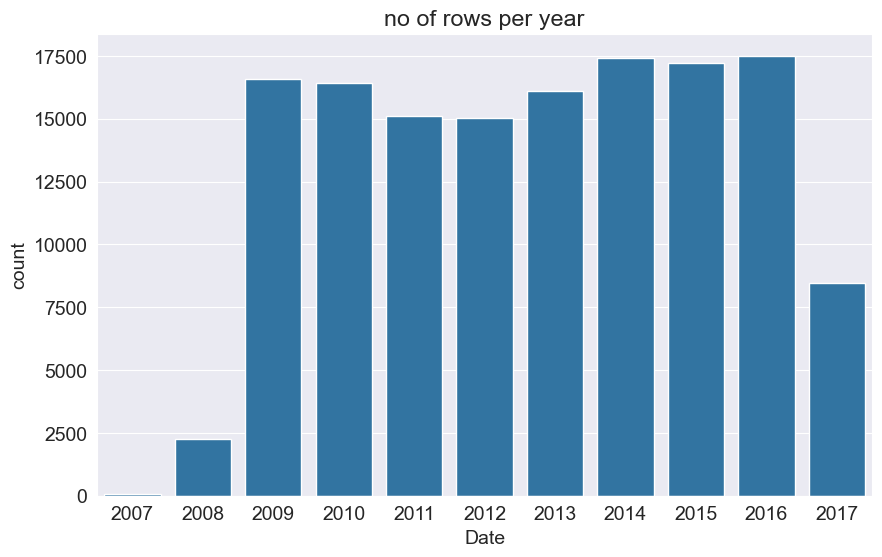

In [10]:
plt.title('no of rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year)

In [11]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year>2015]

In [12]:
print('train_df.shape:',train_df.shape)
print('val_df.shape:',val_df.shape)
print('test_df.shape:',test_df.shape)

train_df.shape: (98988, 23)
val_df.shape: (17231, 23)
test_df.shape: (25974, 23)


In [13]:
input_cols = list(train_df.columns)[1:-1]
target_cols = "RainTomorrow"

In [14]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_cols].copy()
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_cols].copy()
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_cols].copy()

In [15]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [16]:
categorical_Cols = train_inputs.select_dtypes(include='object').columns.tolist()
categorical_Cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imputer= SimpleImputer(strategy='mean').fit(raw_df[numerical_cols])

In [19]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [20]:
test_inputs[numerical_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler().fit(raw_df[numerical_cols])

In [23]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [24]:
train_inputs.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000
mean,0.483557,0.525583,0.006395,0.036934,0.524929,0.265223,0.108470,0.215734,0.686543,0.515015,0.612080,0.608796,0.483856,0.494156,0.506933,0.516827
std,0.149330,0.132006,0.022845,0.021552,0.200488,0.102531,0.068789,0.101451,0.188738,0.206181,0.111257,0.106567,0.254707,0.237394,0.134483,0.130703
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037723,0.525852,0.255814,0.100000,0.218391,0.690000,0.520000,0.614112,0.610531,0.493021,0.500352,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
train_inputs.loc[:, categorical_Cols] = train_inputs[categorical_Cols].fillna('Unknown')
val_inputs.loc[:, categorical_Cols] = val_inputs[categorical_Cols].fillna('Unknown')
test_inputs.loc[:, categorical_Cols] = test_inputs[categorical_Cols].fillna('Unknown')


In [27]:
train_inputs[categorical_Cols].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [28]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [29]:
encoder.fit(train_inputs[categorical_Cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [30]:
encoded_Cols = list(encoder.get_feature_names_out(categorical_Cols))

In [31]:
# Step 1: Fit the encoder on the categorical columns to create the one-hot encoded columns
encoder.fit(train_inputs[categorical_Cols])

# Step 2: Transform the categorical columns to one-hot encoded columns (encoded_Cols)
train_inputs_encoded = encoder.transform(train_inputs[categorical_Cols])
val_inputs_encoded = encoder.transform(val_inputs[categorical_Cols])
test_inputs_encoded = encoder.transform(test_inputs[categorical_Cols])

# Step 3: Apply scaling to the one-hot encoded columns (encoded_Cols)
scaler.fit(train_inputs_encoded)  # Fit the scaler on the one-hot encoded train data

train_inputs_encoded = scaler.transform(train_inputs_encoded)  # Transform the train data
val_inputs_encoded = scaler.transform(val_inputs_encoded)      # Transform the validation data
test_inputs_encoded = scaler.transform(test_inputs_encoded)    # Transform the test data

# Optionally, put the scaled data back into the original DataFrame format if needed
train_inputs[encoded_Cols] = train_inputs_encoded
val_inputs[encoded_Cols] = val_inputs_encoded
test_inputs[encoded_Cols] = test_inputs_encoded


C:\Users\Ayush Maurya\AppData\Local\Temp\ipykernel_31916\1647945705.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_Cols] = train_inputs_encoded
C:\Users\Ayush Maurya\AppData\Local\Temp\ipykernel_31916\1647945705.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_Cols] = train_inputs_encoded
C:\Users\Ayush Maurya\AppData\Local\Temp\ipykernel_31916\1647945705.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

In [32]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unknown,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unknown,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037723,0.525852,W,0.294574,W,WNW,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037723,0.525852,WNW,0.294574,NNW,WSW,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037723,0.525852,WSW,0.310078,W,WSW,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037723,0.525852,NE,0.139535,SE,E,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [33]:
X_train = train_inputs[numerical_cols+encoded_Cols]
X_val =  val_inputs[numerical_cols+encoded_Cols]
X_test = test_inputs[numerical_cols+encoded_Cols]

In [34]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unknown,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unknown,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

In [35]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

TRAINING

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier(random_state=42)

In [38]:
model.fit(X_train,train_target)

DecisionTreeClassifier(random_state=42)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
train_preds = model.predict(X_train)

In [41]:
pd.value_counts(train_preds)

C:\Users\Ayush Maurya\AppData\Local\Temp\ipykernel_31916\1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     76707
Yes    22281
Name: count, dtype: int64

In [42]:
accuracy_score(train_preds,train_target)

0.9999797955307714

In [43]:
train_probs = model.predict_proba(X_train)

In [44]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [45]:
model.score(X_val,val_target)

0.7928152747954268

In [46]:
val_target.value_counts()/len(val_target)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

In [47]:
model.score(X_test,test_target)

0.7772772772772772

In [48]:
test_target.value_counts()/len(test_target)

RainTomorrow
No     0.771079
Yes    0.228921
Name: count, dtype: float64

In [49]:
from sklearn.tree import plot_tree,export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125,

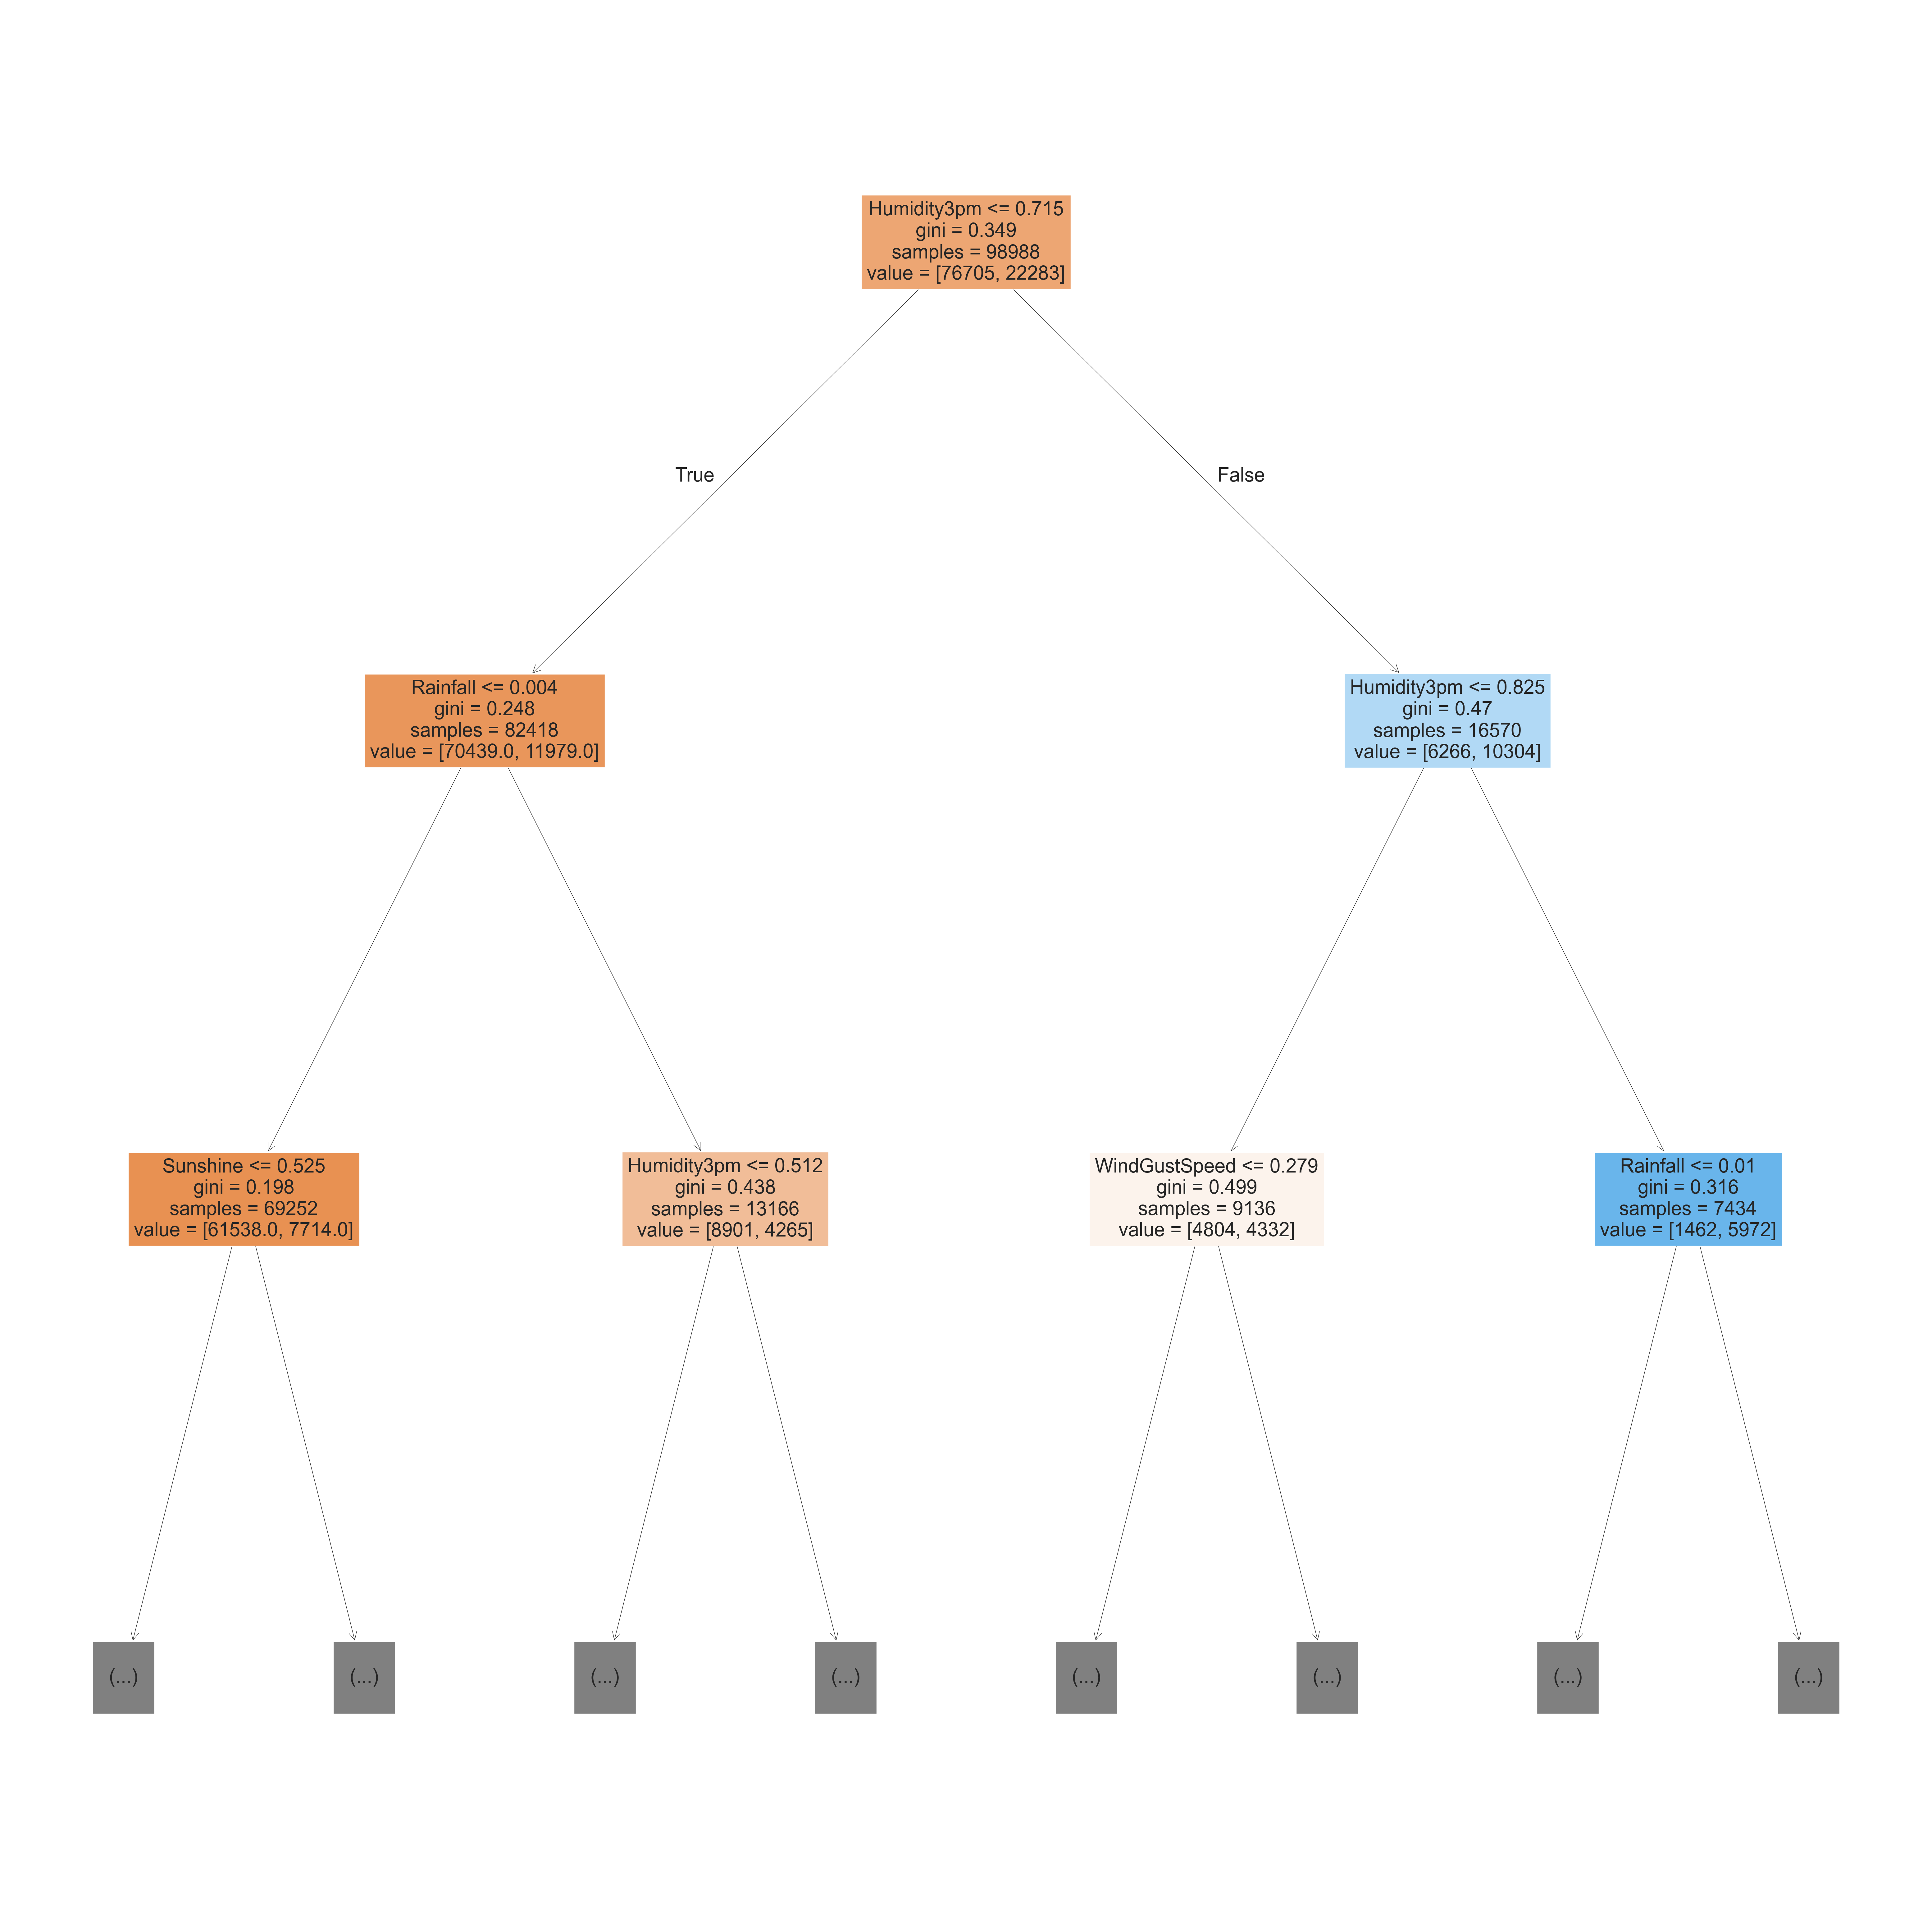

In [50]:
plt.figure(figsize=(80,80))
plot_tree(model,feature_names=X_train.columns,max_depth=2,filled=True)

In [51]:
model.tree_.max_depth

48

In [52]:
tree_text = export_text(model,max_depth= 10,feature_names=(list(X_train.columns)))
tree_text

'|--- Humidity3pm <= 0.72\n|   |--- Rainfall <= 0.00\n|   |   |--- Sunshine <= 0.52\n|   |   |   |--- Pressure3pm <= 0.58\n|   |   |   |   |--- WindGustSpeed <= 0.36\n|   |   |   |   |   |--- Humidity3pm <= 0.28\n|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50\n|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50\n|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83\n|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07\n|   |   |   |   |   |   |   |   |   |   |--- Pressure9am <= 0.47\n|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes\n|   |   |   |   |   |   |   |   |   |   |--- Pressure9am >  0.47\n|   |   |   |   |   |   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07\n|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2\n|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32\n|   |   |   |   |   |   |   |   |   |  

FEATURE IMPORTANCE

In [53]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_Unknown', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday_No', 'RainToday_Unknown', 'RainToday_Yes'],
      dtype='object', length=119)

In [54]:
model.feature_importances_

array([3.43949832e-02, 3.20723744e-02, 5.96978427e-02, 2.39997157e-02,
       4.96970278e-02, 5.52776844e-02, 2.77290154e-02, 2.87896517e-02,
       3.97762378e-02, 2.61665505e-01, 3.38797443e-02, 6.29086081e-02,
       1.41634157e-02, 1.82574107e-02, 3.39304134e-02, 2.99978180e-02,
       2.29983521e-03, 1.97127428e-03, 1.30448300e-03, 7.05458133e-04,
       1.51355792e-03, 1.12862805e-03, 8.66864394e-04, 1.77451768e-03,
       1.21677026e-03, 1.57331930e-03, 8.42954495e-04, 2.05031388e-03,
       1.90637772e-03, 3.26731137e-04, 1.11629763e-03, 1.52431517e-03,
       5.08479231e-04, 8.30004101e-04, 1.48248394e-03, 8.87667861e-04,
       7.61612213e-04, 7.02994607e-04, 1.72668316e-03, 2.07806756e-03,
       3.80229195e-04, 7.64016199e-04, 1.38715756e-03, 1.47491895e-03,
       1.48825382e-03, 8.67028594e-04, 8.33784178e-04, 1.54580309e-03,
       1.09367536e-03, 2.03218887e-03, 8.51581460e-04, 1.79979059e-03,
       9.69639078e-04, 1.28254100e-03, 1.28721925e-03, 3.77018000e-04,
      

In [55]:
importance_df = pd.DataFrame({'feature':X_train.columns,'importance':model.feature_importances_}).sort_values('importance',ascending=False)
importance_df

,feature,importance
9,Humidity3pm,0.261666
11,Pressure3pm,0.062909
2,Rainfall,0.059698
5,WindGustSpeed,0.055278
4,Sunshine,0.049697
8,Humidity9am,0.039776
0,MinTemp,0.034395
14,Temp9am,0.033930
10,Pressure9am,0.033880
1,MaxTemp,0.032072


<Axes: title={'center': 'importance'}, xlabel='importance', ylabel='feature'>

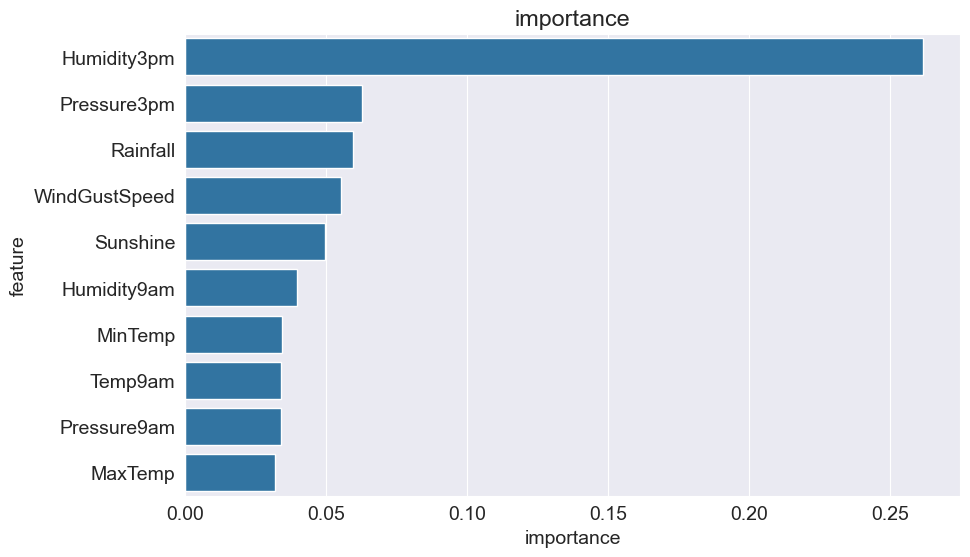

In [56]:
plt.title('importance')
sns.barplot(importance_df.head(10),x = 'importance',y = 'feature')

HYPERPARAMETER TUNING AND OVERFITTING

WHEN WE HAVE 100% SURITY WITH TRAIN BUT NOT WITH THE TEST SO WE DECREASE MAX DEPTH 

In [57]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [58]:
model = DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(X_train,train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [59]:
model.score(X_train,train_target)

0.8291308037337859

In [60]:
model.score(X_val,val_target)

0.8334397307178921

In [61]:
model.score(X_test,test_target)

0.8235928235928236

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSp

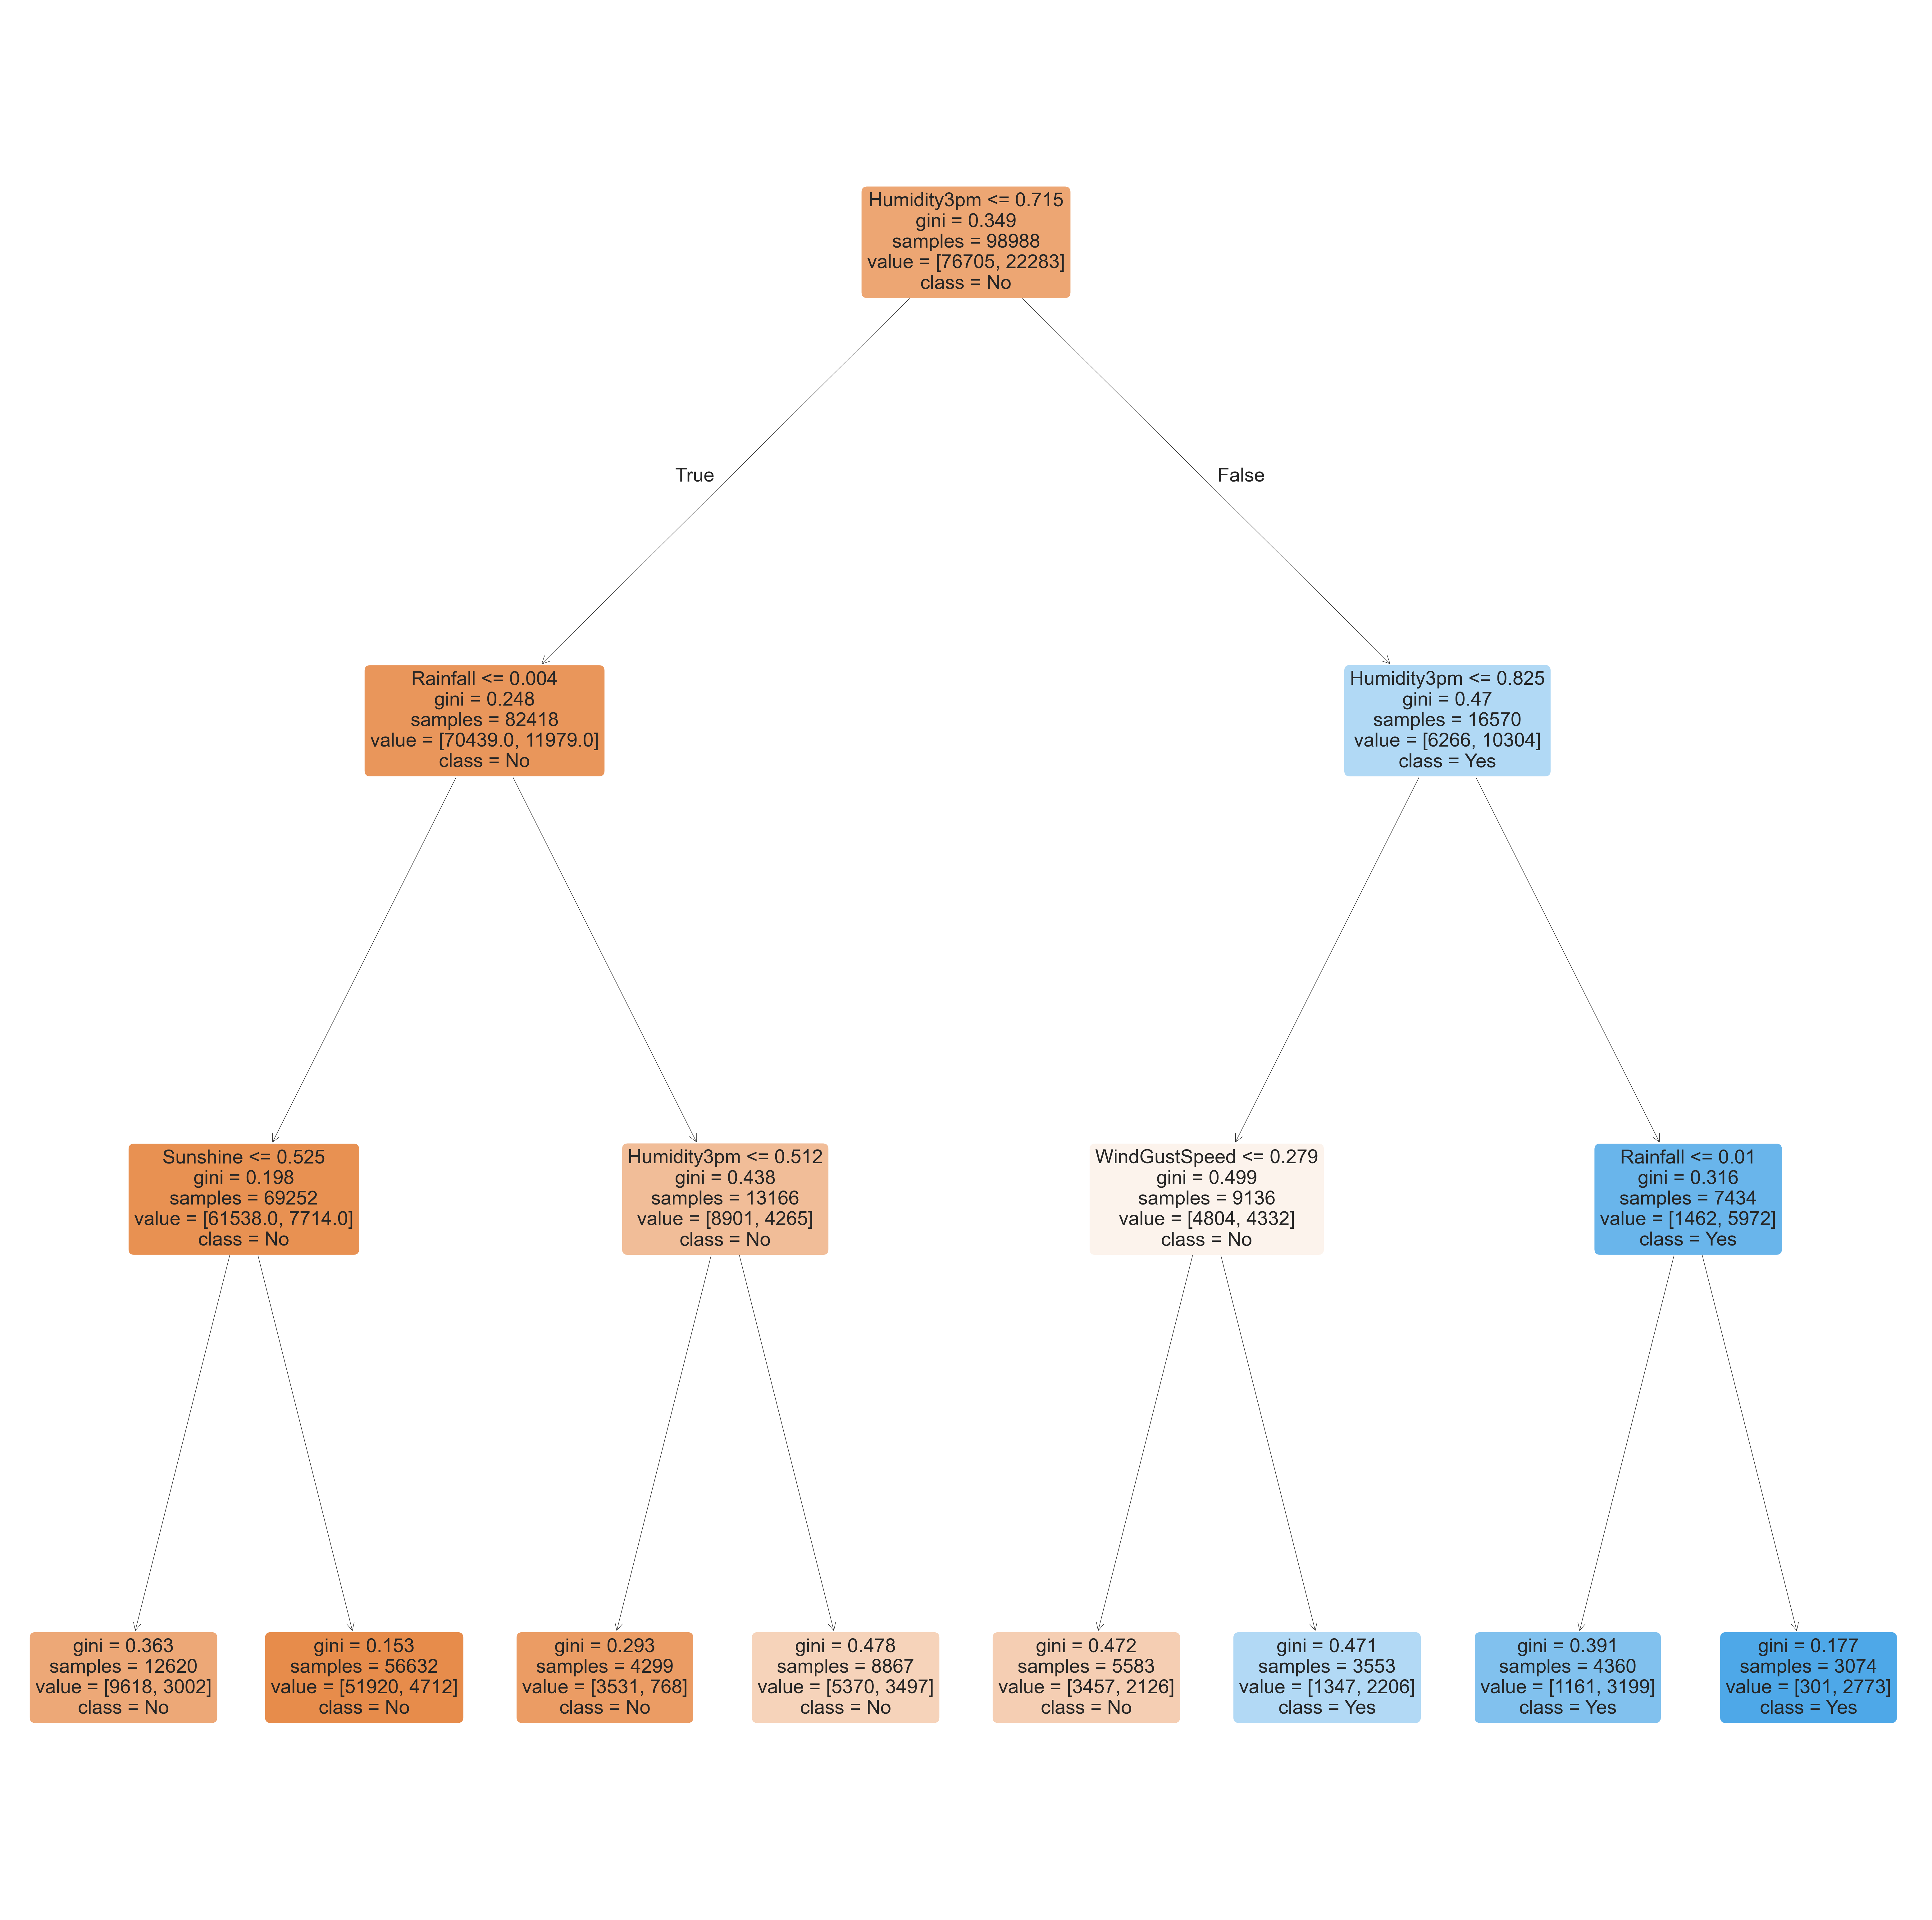

In [62]:
plt.figure(figsize=(80,80))
plot_tree(model,feature_names=X_train.columns,rounded=True,filled=True,class_names=model.classes_)

In [63]:
print(export_text(model,feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [64]:
def maxdepth_error(md):
    model = DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train,train_target)
    train_error = 1-model.score(X_train,train_target)
    val_error = 1-model.score(X_val,val_target)
    return{'maxdepth':md,'trainin_gerrror':train_error,'validating_erro':val_error}
    

In [65]:
errors_df= pd.DataFrame([maxdepth_error(md) for md in range(1,21)])
errors_df

,maxdepth,trainin_gerrror,validating_erro
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157739
8,9,0.140916,0.156578
9,10,0.132966,0.157565


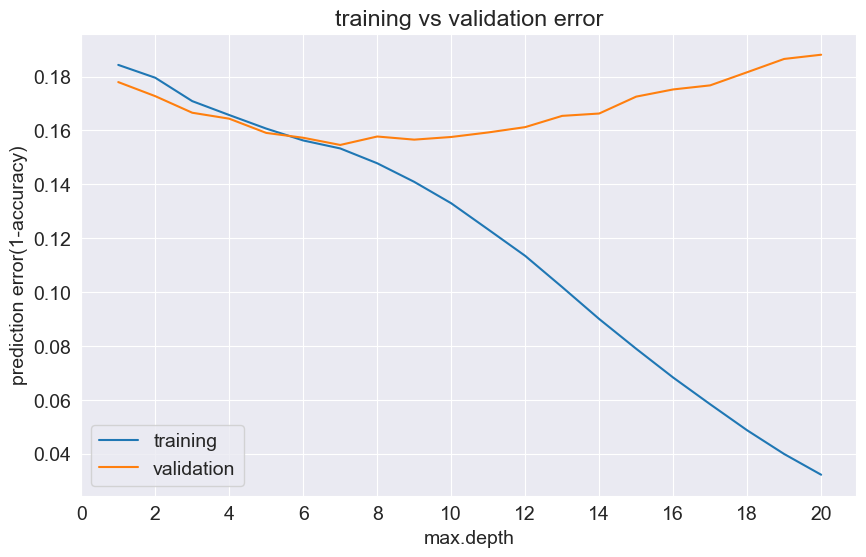

In [66]:
plt.figure()
plt.plot(errors_df['maxdepth'],errors_df['trainin_gerrror'])
plt.plot(errors_df['maxdepth'],errors_df['validating_erro'])
plt.title("training vs validation error")
plt.xticks(range(0,21,2))
plt.xlabel('max.depth')
plt.ylabel('prediction error(1-accuracy)')
plt.legend(['training','validation'])

thats why max depth at 7 is best because validation error is lowest

In [67]:
model = DecisionTreeClassifier(max_depth=7,random_state=42).fit(X_train,train_target)
model.score(X_train,train_target),model.score(X_val,val_target)

(0.8466884874934335, 0.8453949277465034)

max leaf nodes : - another way to control complexity of decision tree

In [68]:
model = DecisionTreeClassifier(max_depth=7,max_leaf_nodes=128,random_state=42).fit(X_train,train_target)
model.score(X_train,train_target),model.score(X_val,val_target)

(0.8466884874934335, 0.8453949277465034)

In [69]:
model.tree_.max_depth

7

In [70]:
model_test = export_text(model,feature_names=list(X_train.columns))
model_test

'|--- Humidity3pm <= 0.72\n|   |--- Rainfall <= 0.00\n|   |   |--- Sunshine <= 0.52\n|   |   |   |--- Pressure3pm <= 0.58\n|   |   |   |   |--- WindGustSpeed <= 0.36\n|   |   |   |   |   |--- Humidity3pm <= 0.28\n|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50\n|   |   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |   |--- WindDir9am_NE >  0.50\n|   |   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |--- Humidity3pm >  0.28\n|   |   |   |   |   |   |--- Sunshine <= 0.05\n|   |   |   |   |   |   |   |--- class: Yes\n|   |   |   |   |   |   |--- Sunshine >  0.05\n|   |   |   |   |   |   |   |--- class: No\n|   |   |   |   |--- WindGustSpeed >  0.36\n|   |   |   |   |   |--- Humidity3pm <= 0.45\n|   |   |   |   |   |   |--- Sunshine <= 0.39\n|   |   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |   |--- Sunshine >  0.39\n|   |   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |--- Humidity3pm >  0.45\n|   |   |   |   |   |   |--- Pressure3pm <= 0.49

TRAINING AN RANDOM FOREST


hyperparameter tuning with random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1,random_state=42)

n jobs allows the random forest to use multiple parallel workers to train decision tree.

In [72]:
model.fit(X_train,train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [73]:
model.score(X_train,train_target),model.score(X_val,val_target),model.score(X_test,test_target)

(0.9999595910615429, 0.8559572862863444, 0.8455763455763455)

In [74]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.9 , 0.1 ],
       [0.97, 0.03],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])

we can have individual decision tree by using estimators

In [75]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [76]:
len(model.estimators_)

100

[Text(0.5, 0.875, 'RainToday_Yes <= 0.5\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]'),
 Text(0.25, 0.625, 'Cloud9am <= 0.611\ngini = 0.262\nsamples = 48769\nvalue = [65102, 11926]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'WindDir9am_E <= 0.5\ngini = 0.212\nsamples = 36906\nvalue = [51301, 7031]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindDir9am_N <= 0.5\ngini = 0.387\nsamples = 11863\nvalue = [13801.0, 4895.0]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pressure3pm <= 0.556\ngini = 0.497\nsamples = 13838\nvalue = [11785.0, 10175.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Humidity9am <= 0.825\ngini = 0.482\nsamples = 5022\nvalue = [3250, 4755]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Location_WaggaWagga <= 0.5\ngini = 0.475\nsamples = 8816\nvalue = [8535, 5420]'),
 Text(0.

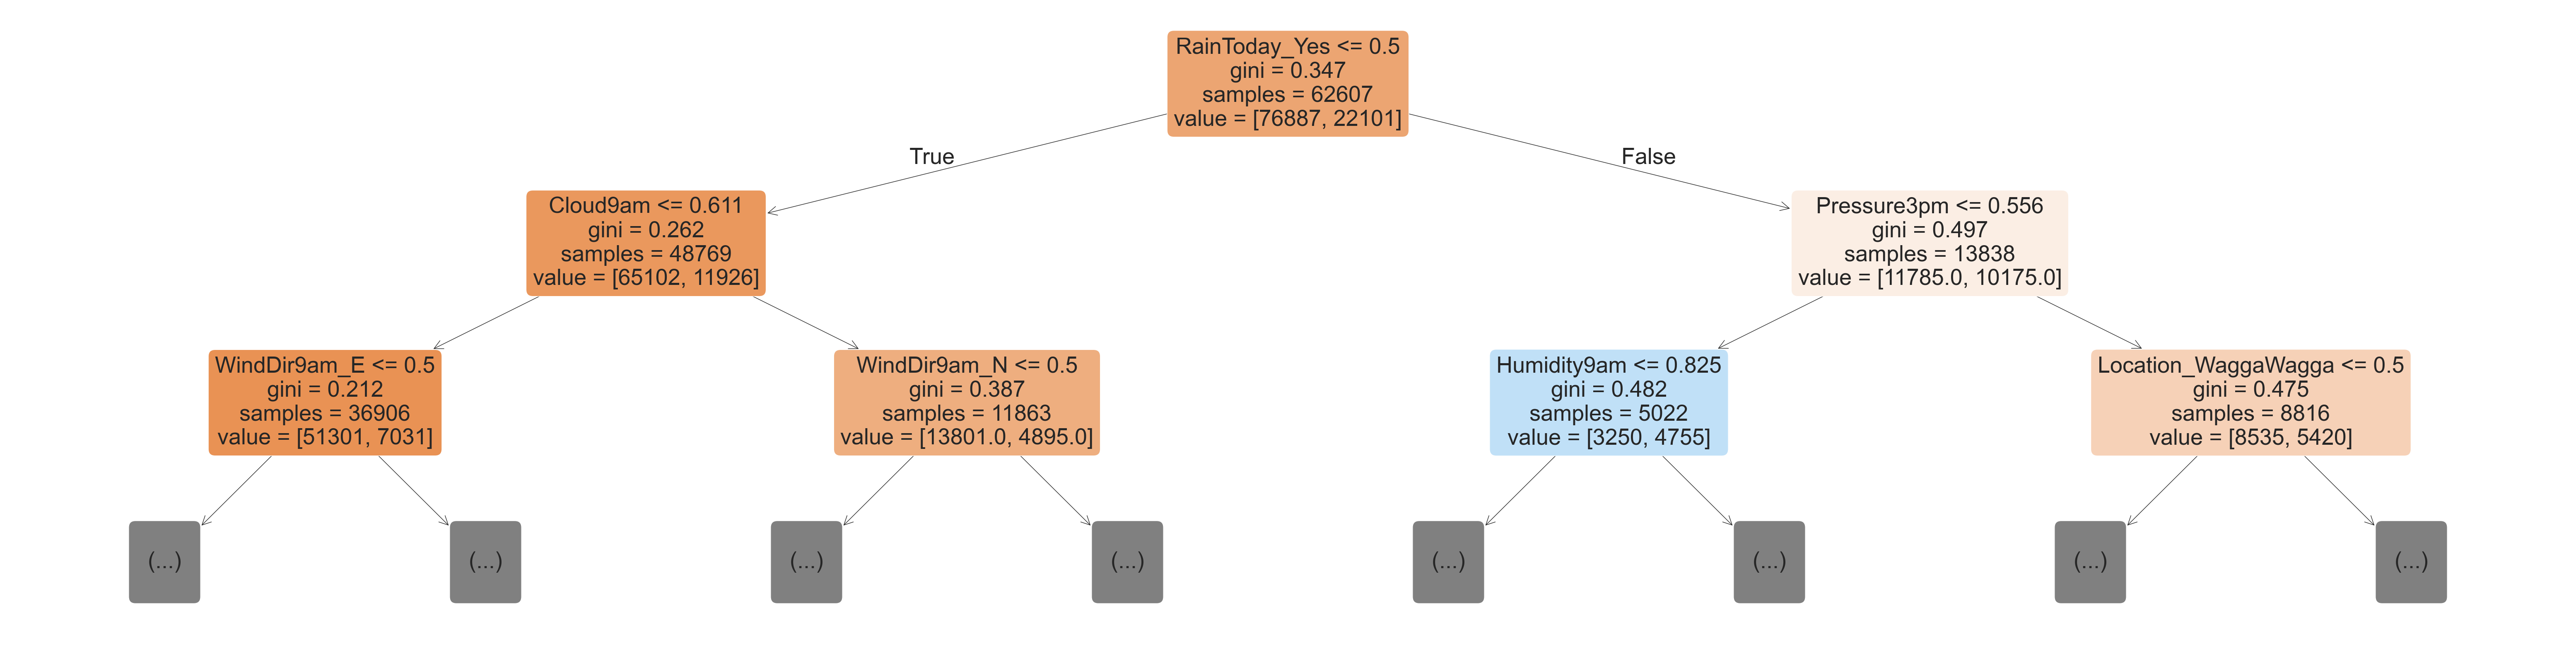

In [77]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0],max_depth=2,feature_names=X_train.columns,filled=True,rounded=True)

[Text(0.5, 0.875, 'WindGustDir_E <= 0.5\ngini = 0.349\nsamples = 62548\nvalue = [76707, 22281]'),
 Text(0.25, 0.625, 'Cloud3pm <= 0.722\ngini = 0.354\nsamples = 58663\nvalue = [71433, 21327]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Humidity3pm <= 0.655\ngini = 0.284\nsamples = 46044\nvalue = [60407.0, 12479.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Rainfall <= 0.004\ngini = 0.494\nsamples = 12619\nvalue = [11026, 8848]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'WindDir3pm_ENE <= 0.5\ngini = 0.259\nsamples = 3885\nvalue = [5274, 954]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Cloud3pm <= 0.833\ngini = 0.266\nsamples = 3273\nvalue = [4387.0, 823.0]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Cloud9am <= 0.611\ngini = 0.224\nsamples = 612\nvalue = [887, 131]'),
 Text(0.8125, 0.125, '\n  (

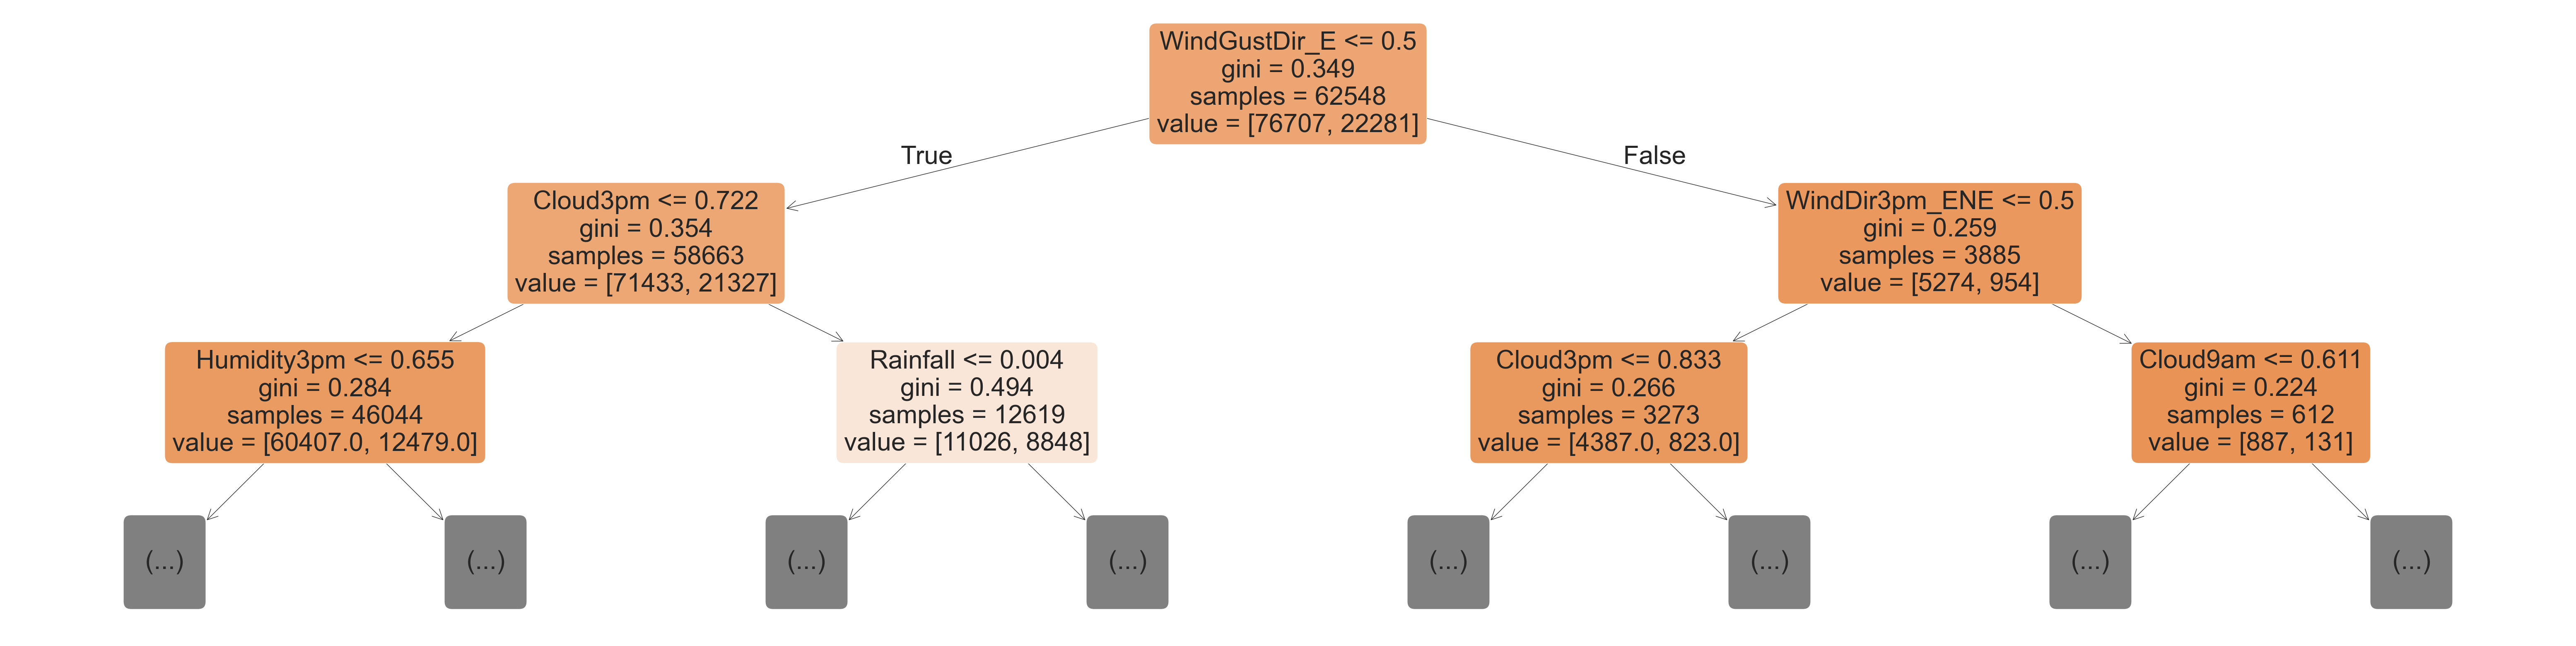

In [78]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[18],max_depth=2,feature_names=X_train.columns,filled=True,rounded=True)

In [79]:
importance_df = pd.DataFrame({'feature':X_train.columns,'importance':model.feature_importances_}).sort_values('importance',ascending=False)
importance_df.head(10)


,feature,importance
9,Humidity3pm,0.133176
4,Sunshine,0.055553
11,Pressure3pm,0.052976
2,Rainfall,0.050488
10,Pressure9am,0.049379
8,Humidity9am,0.049261
5,WindGustSpeed,0.046640
15,Temp3pm,0.045179
1,MaxTemp,0.042172
0,MinTemp,0.041549


<Axes: title={'center': 'feature importance'}, xlabel='importance', ylabel='feature'>

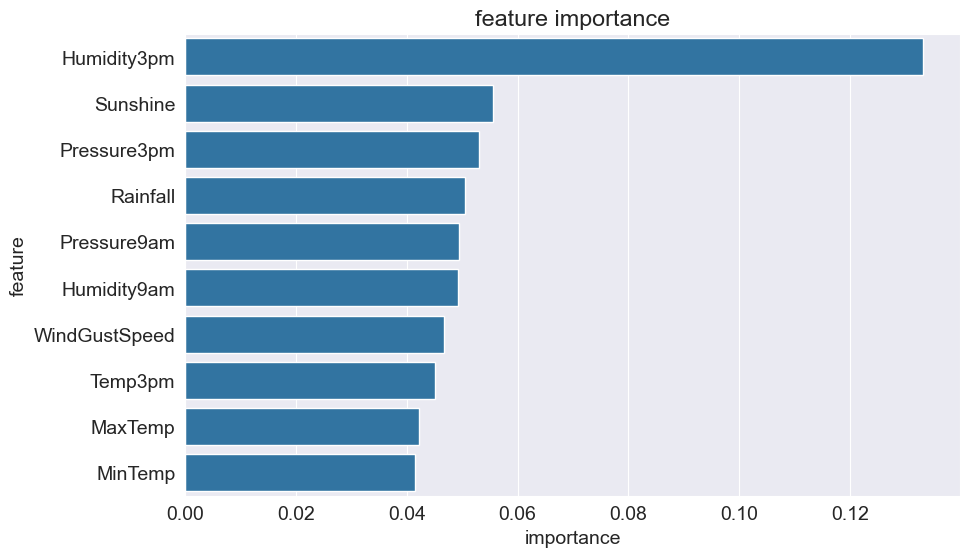

In [80]:
plt.title('feature importance')
sns.barplot(data = importance_df.head(10),x = 'importance',y = 'feature')

hyperparametre tuning with random forest

In [81]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [82]:
base_model = RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train,train_target)

n_estimators

In [83]:
model = RandomForestClassifier(random_state=42,n_jobs = -1,n_estimators = 10)
model.fit(X_train,train_target)
model.score(X_train,train_target),model.score(X_val,val_target),model.score(X_test,test_target)

(0.9873520022629005, 0.8441761940688295, 0.8326018326018326)

In [84]:
model = RandomForestClassifier(random_state=42,n_jobs = -1,n_estimators = 200)
model.fit(X_train,train_target)
model.score(X_train,train_target),model.score(X_val,val_target),model.score(X_test,test_target)

(0.9999797955307714, 0.8561894260344728, 0.8453453453453453)

In [85]:
def check_estimators(nd):
    model = RandomForestClassifier(random_state=42,n_jobs = -1,n_estimators = nd)
    model.fit(X_train,train_target)
    train_error = model.score(X_train,train_target)
    val_error = 1-model.score(X_val,val_target)
    test_error = 1-model.score(X_test,test_target)   
    return {'nestimator':nd,'trainin_gerrror':train_error,'validating_erro':val_error,'test_error':test_error}

In [86]:
errors_df = pd.DataFrame([check_estimators(nd) for nd in range(100,600,200)])

In [87]:
errors_df

,nestimator,trainin_gerrror,validating_erro,test_error
0,100,0.99996,0.144043,0.154424
1,300,0.99998,0.142998,0.153885
2,500,0.99998,0.142708,0.154116


max depth and leaf nodes

In [88]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42,n_jobs= -1,**params).fit(X_train,train_target)
    return model.score(X_train,train_target),model.score(X_val,val_target)

In [89]:
test_params(max_depth = 5,max_leaf_nodes = 1024,n_estimators = 1000)

(0.8221299551460783, 0.8266496430851372)

In [90]:
test_params(max_depth = 26,max_leaf_nodes = 1024,n_estimators = 1000)

(0.878540833232311, 0.8510823515756485)

In [91]:
test_params(max_depth = 26)

(0.9820685335596234, 0.857001915152922)

MAX FEATURE

instead of using all 119 columns for random tree split lets specify the column which should we use

In [92]:
test_params(max_features = 'log2')

(0.9999595910615429, 0.8540421333642852)

In [93]:
test_params(max_features = 3)

(0.9999595910615429, 0.8528814346236434)

In [94]:
test_params(max_features = 20)

(0.9999494888269285, 0.8575242295862109)

In [95]:
best_accs = list(test_params(max_features = 20))

In [96]:
best_accs

[0.9999494888269285, 0.8575242295862109]

min_sample_split and min_sample_leaf

In [97]:
test_params(min_samples_split = 5,min_samples_leaf = 2)

(0.9578231704853114, 0.8554930067900877)

In [98]:
test_params(min_samples_split = 100,min_samples_leaf = 60)

(0.8501131450276801, 0.8455109976205676)

In [99]:
best_accs

[0.9999494888269285, 0.8575242295862109]

min impurity decrease

In [100]:
test_params(min_impurity_decrease = 1e-7)

(0.9996363195538853, 0.8558992513493123)

In [101]:
test_params(min_impurity_decrease = 1e-6)

(0.9883420212551016, 0.8568858452788579)

In [102]:
best_accs

[0.9999494888269285, 0.8575242295862109]

Bootstrap,max_samples

In [103]:
test_params(bootstrap = False)

(0.9999797955307714, 0.8558992513493123)

In [104]:
test_params(max_samples = 0.9)

(0.9997575463692568, 0.8565956705936975)

class weight

In [105]:
(train_target.value_counts()/len(train_target))*100

RainTomorrow
No     77.489191
Yes    22.510809
Name: count, dtype: float64

In [106]:
test_params(class_weight= 'balanced')

(0.9999595910615429, 0.8560153212233764)

In [107]:
test_params(class_weight={'No':1,'Yes':2})

(0.9999292843576999, 0.8565376356566653)

In [108]:
best_accs

[0.9999494888269285, 0.8575242295862109]

putting it together

In [109]:
model = RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=50,max_features=7,max_depth=30,class_weight={'No':1,'Yes':1.5}).fit(X_train,train_target)

In [110]:
model.score(X_train,train_target),model.score(X_val,val_target),

(0.9899280720895463, 0.8540421333642852)

In [111]:
best_accs

[0.9999494888269285, 0.8575242295862109]

In [112]:
model.score(X_test,test_target)

0.843073843073843